# Predicting Iowa House Sale Prices
## Introduction

In this project, we will take the housing data for the city of Ames, Iowa, United States from 2006 to 2010, and do the following:
- Split the data into the train set and test set
- Perform feature selection
- Make predictions on the train set, using the K-Folds and LinearRegression methods.

This project refers to the study published by [Dean De Cock (2017)](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627), and a description of the various columns in the data set are included [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

## Load the data set

In [2]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")

In [3]:
df.head(3)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000


In [4]:
df.shape

(2930, 82)

The data set has 2930 rows and 82 columns.

In [5]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

## Dependent variable - house price

In [6]:
df['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

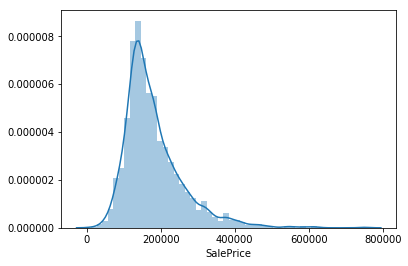

In [7]:
#histogram
sns.distplot(df['SalePrice'])

In [8]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.743500
Kurtosis: 5.118900


In this project, we will be using the other columns as the features to predict the dependent variable - house price.  In this data set, the mean house price is 180,796,  the median is 160,000 and the standard deviation is 79,887.  While the house prices roughly follow a normal distribution pattern, the distribution is skewed to the right, with a Skewness of 1.74 and Kurtosis of 5.12.

## Computing model accuracy before feature selection
Without feature selection, we would expect the accuracy of the model to be lower. Here, we will first measure model accuracy using  [Root Mean Square Error](https://www.statisticshowto.datasciencecentral.com/rmse/) (RMSE), and then compare the predictive model's RMSE after feature selection to see if there is any noticeable improvement in model accuracy. 

The data has 2930 rows and we split this into the train set (up to row 1460) and the test set (after row 1460).
We do not perform any feature selection, while the label (dependent variable) is the predicted house price, or the 'Sale Price' column.

In [9]:
# Create a function named transform_features() that, for now, 
# just returns the train data frame.
def transform_features(df):
    return df

# Create a function named select_features() that, for now, 
# just returns the Gr Liv Area and SalePrice columns from the train data frame.
def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    # Select only columns that are ONLY 'integer' or 'float'
    # using `pd.DataFrame.select_dtypes()`
    # and return only those columns as a data frame.
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', float])
    
    # Remove the SalePrice column (the target column) from the data frame
    # Use `pd.Series.drop()`
    features = numeric_train.columns.drop('SalePrice')
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test['SalePrice'], predictions)
    rmse = np.sqrt(mse)
    
    return rmse


transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

57088.25161263909

In the function above, the RMSE without any feature selection is approximately 57088.

## Feature Engineering -  Data Cleaning

In this section, we will now start our Feature Engineering by removing features with  missing values:

- All columns: Drop any column with 5% or more missing values.
- Text columns: Drop any columnwith 1 or more missing values.
- Numerical columns: For columns with missing values, fill in with the most common value in that column








In [10]:
# 1. All columns: Drop any with 5% or more missing values for now.

# Show columns with number of missing values
num_missing = df.isnull().sum()

# Find columns containing >5% missing values
drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values()

# Drop those columns from the data frame. Note the use of the .index accessor
df = df.drop(drop_missing_cols.index, axis=1)
df.shape

(2930, 71)

By removing columns with 5% or more missing values, the number of columns was reduced from 82 to 71.  Next, we will remove any text (object) columns that have 1 or more missing values, using text_mv_counts as the Boolean mask. 

In [11]:
# 2. Text columns: Drop any with 1 or more missing values for now.

# Series object: column name -> number of missing values
# mv = missing values
text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

# Filter Series to columns containing *any* missing values
drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]

# df = df.drop
df = df.drop(drop_missing_cols_2.index, axis=1)
df.shape

(2930, 64)

The number of columns was further reduced to 64.  For the remaining numerical columns that still have missing values, we will first rank them by number of missing values, and then replace these missing values using the most commonly occurring value (using the .mode method): 

In [12]:
# 3: Numerical columns: For columns with missing values, 
# fill in with the most common value in that column

## Compute column-wise missing value counts
num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
fixable_numeric_cols

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [13]:
# Compute the most common value for each column in `fixable_nmeric_missing_cols`.
replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
replacement_values_dict

{'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Bsmt Unf SF': 0.0,
 'Total Bsmt SF': 0.0,
 'Garage Cars': 2.0,
 'Garage Area': 0.0,
 'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Mas Vnr Area': 0.0}

The fillna() is used to replace the missing values with the above dictionary:

In [14]:
# Use `pd.DataFrame.fillna()` to replace missing values.
df = df.fillna(replacement_values_dict)

We then use the following chain method to ensure none of the columns still contain any missing values:

In [15]:
# Verify that every column has 0 missing values
df.isnull().sum().value_counts()

0    64
dtype: int64

In subsequent sections, we will perform some additional Feature Engineering steps:
- Remove any columns that leak information about the sale (e.g.  the year the sale happened). 
- Remove features that we don't want to use in the model, just based on the number of missing values or data leakage
- Transform features into the proper format (numerical to categorical, scaling numerical, filling in missing values, etc)
- Create new features by combining other features

## Feature Engineering -  Columns

What new features can we create to spot possible issues with data quality?

We can cross-check the number of years the house has existed before it was sold by taking the year it was sold minus the year it was built - logically this should be a positive number:

In [16]:
years_sold = df['Yr Sold'] - df['Year Built']
years_sold[years_sold < 0]

2180   -1
dtype: int64

We find that in row 2180, there was an instance of the year sold being earlier than the year built - this should be removed.

In [17]:
years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

Similarly, the year sold should not be earlier than the year the house was remodelled.  We find an additional three rows where the data is in error.

We can create two new columns called 'Years Before Sale' and 'Years Since Remod', and drop the rows where these values are negative:

In [18]:
# Create new columns
df['Years Before Sale'] = years_sold
df['Years Since Remod'] = years_since_remod

# Drop rows with negative values for both of these new features
# axis=0 for rows
df = df.drop([1702, 2180, 2181], axis=0)

# No longer need original year columns
df = df.drop(['Year Built', 'Year Remod/Add'], axis = 1)

We note that the first two columns ("PID" and "Order") are merely serial numbers that are not useful for machine learning.  We will remove them using the drop() method:

In [19]:
# Drop columns that aren't useful for ML
df = df.drop(["PID", "Order"], axis=1)

We also find some columns that leak info about the final sale, which would compromise the predictions and also need to be removed:

In [20]:
# Drop columns that leak info about the final sale
df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

## Feature Selection - Writing new functions

To speed up the feature engineering prcoess, we can write new functions that combine the above Feature Engineering steps and also give us the flexibility to alter the arguments as needed.  This includes removing features with many missing values, diving deeper into potential categorical features, and transforming text and numerical columns. 

### transform_features()
We will start by writing the transform_features function which will do the following: 
 - Remove any column from the data frame with more than 5% missing values.
 - Remove any columns that leak information about the sale (e.g. the year the sale happened).
 - Transform features into the proper format (numerical to categorical, scaling numerical, filling in missing values, etc)
 - Create new features by combining other features such as 'Yr Sold', 'Year Built' and 'Year Remod/Add'

In [21]:
"""
The transform_features() function shouldn't modify the train data frame 
and instead return a new one entirely. 
This way, we can keep using train in the experimentation cells.
"""

# Combines the above data cleaning code into this function
def transform_features(df):
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)
    
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    df = df.fillna(replacement_values_dict)
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)

    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    return df

### select_features()

After using transform_features to do Feature Engineering, we write the select_features() function which will take in the new, modified train and test data frames that were returned from transform_features.

In [22]:
# for numerical_df, include 'int64' or else cannot read df["SalePrice"]

def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    numerical_df = df.select_dtypes(include=['int', 'int64', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(text_cols,axis=1)
    
    return df

### train_and_test()

After doing the Feature Engineering, we now move on to the final part, which is the training and testing. When iterating on different features, using simple validation is a good idea. Let's add a parameter named k that controls the type of cross validation that occurs.

The train_and_test will perform the following validation for k:
 - k == 0: perform holdout validation
 - k == 1: perform simple cross validation
 - k > 1: implement k-fold cross validation using k folds

In [23]:
# The optional k parameter should accept integer values, with a default value of 0.

def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop('SalePrice')
    lr = linear_model.LinearRegression()
    
    # When k equals 0, perform holdout validation 
    # Select the first 1460 rows and assign to train
    # Select the remaining rows and assign to test.
    if k == 0:
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train['SalePrice'])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test['SalePrice'], predictions)
        rmse = np.sqrt(mse)
        
        return rmse
    
    # When k equals 1, perform simple cross validation
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])  
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])   
        
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    
    # or else, implement k-fold cross validation using k folds
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train['SalePrice'])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test['SalePrice'], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

In [24]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4)

rmse

[26031.341624957317, 29567.07799429318, 25724.44931769011, 36129.76028929929]


29363.157306559973

## Conclusion
After applying the functions we wrote to perform feature engineering, the RMSE of the test set predictions was significantly reduced from the original 57088 to 29339.  This shows that the proper use of feature selection is useful in improving the accuracy of the linear regression prediction of house sale prices.  